<a href="https://colab.research.google.com/github/malarkeyfrancis/geeks_for_geeks_ML_exercises/blob/main/healthcare/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Heart Disease using Logistic Regression

Our goal is to use Logistic Regression to predict a 10 year risk of future coronary heart disease. We will


In [1]:
# Import datasets

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlip inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

# Data Preparation and loading


In [2]:
#dataset loading

disease_df = pd.read_csv('/content/drive/MyDrive/datasets/CHD_prediction/framingham.csv')
disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


We do not need all of these columns for our analysis so lets drop some of them.

In [3]:
disease_df.drop(['education'], inplace=True, axis=1)
disease_df.rename(columns={'male':'Sex_male'}, inplace=True)
disease_df.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Next lets check if there are any nulls or NaNs in our data and drop them where necessary.

In [4]:
disease_df.dropna(axis= 0, inplace= True)
print(disease_df.head, disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

<bound method NDFrame.head of       Sex_male  age  currentSmoker  cigsPerDay  ...    BMI  heartRate  glucose  TenYearCHD
0            1   39              0         0.0  ...  26.97       80.0     77.0           0
1            0   46              0         0.0  ...  28.73       95.0     76.0           0
2            1   48              1        20.0  ...  25.34       75.0     70.0           0
3            0   61              1        30.0  ...  28.58       65.0    103.0           1
4            0   46              1        23.0  ...  23.10       85.0     85.0           0
...        ...  ...            ...         ...  ...    ...        ...      ...         ...
4233         1   50              1         1.0  ...  25.97       66.0     86.0           1
4234         1   51              1        43.0  ...  19.71       65.0     68.0           0
4237         0   52              0         0.0  ...  21.47       80.0    107.0           0
4238         1   40              0         0.0  ...  25.60  

So the TenYearCHD column is our classifier, and is already set as an int64. Good to see. We will need to split our data in test and training datasets now.

In [9]:
# Assign your groups

X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay','totChol','sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# We need to normalize the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Training and Testing Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


Lets take a look at the TenYearCHD output and see what we can find.

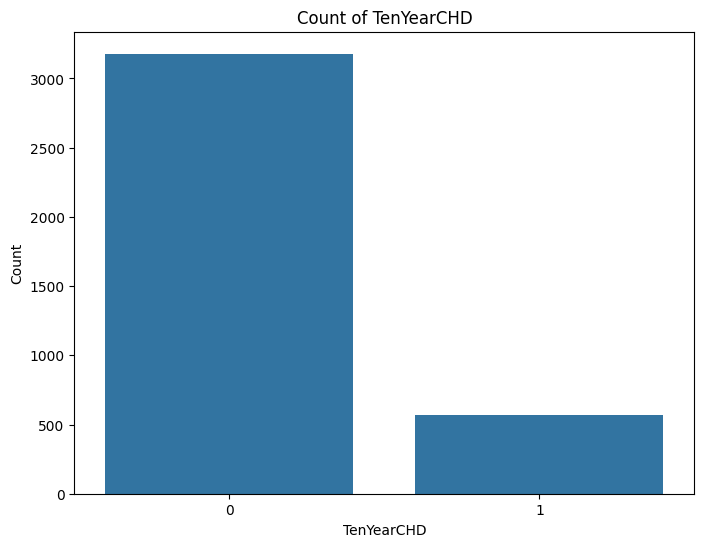

In [10]:
# Plot TenYearCHD from disease_df as a countplot

plt.figure(figsize=(8, 6))
sns.countplot(x='TenYearCHD', data=disease_df)
plt.title('Count of TenYearCHD')
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.show()

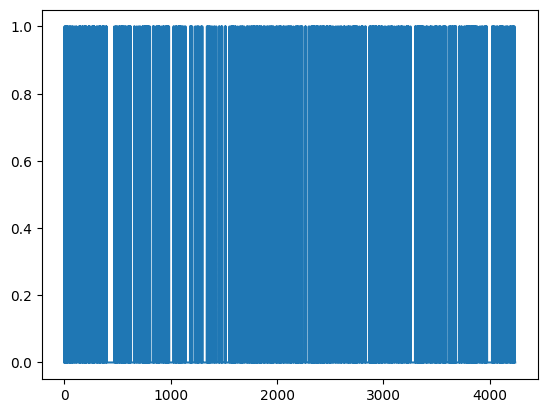

In [11]:
laste = disease_df['TenYearCHD'].plot()
plt.show()